# Fake Video Detection using eye blinking

## Importing libraries

In [3]:
import numpy as np
import pandas as pd
import cv2
import dlib
from scipy.spatial import distance as dist
import os
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier 
from sklearn.neighbors import KNeighborsClassifier
import seaborn as sns
import matplotlib.pyplot as plt
notebook_path = os.path.abspath("Notebook.ipynb")

## Eye Blink and Eye Aspect Ratio calculations

### Function to calculate eye aspect ratio

In [4]:
def eye_aspect_ratio(eye):
    # compute the euclidean distance between the vertical eye landmarks
    A = dist.euclidean(eye[1], eye[5])
    B = dist.euclidean(eye[2], eye[4])

    # compute the euclidean distance between the horizontal eye landmarks
    C = dist.euclidean(eye[0], eye[3])

    # compute the EAR
    ear = (A + B) / (2 * C)
    return ear

### Eye aspect ratio

In [5]:
EYE_AR_THRESH = 0.22
EYE_AR_CONSEC_FRAMES = 3
EAR_AVG = 0

### Counting Blinks in the video

In [6]:
# This function will create a OpenCV window
def count_blinks(video):
    # eye features regions
    RIGHT_EYE_POINTS = list(range(36, 42))
    LEFT_EYE_POINTS = list(range(42, 48))


    COUNTER = 0
    TOTAL = 0

    # to detect the facial region
    detector = dlib.get_frontal_face_detector()
    predictor = dlib.shape_predictor(os.path.join(os.path.dirname(notebook_path), "shape_predictor_68_face_landmarks.dat"
    ))
    # capture frame from local video
    # cap = cv2.VideoCapture("Home/Eye-detect-from-frame/download.jpeg")
    # capture video from live facecam
#     cap = cv2.VideoCapture(0)

    cap = cv2.VideoCapture(os.path.join(os.path.dirname(notebook_path), video))

    while True:
        # get the frame
        ret, frame = cap.read()
        #frame = cv2.resize(frame, (0, 0), fx=0.5, fy=0.5)
        if frame is not []:
            # convert the frame to grayscale
            try:
                gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
            except:
                print(str(TOTAL)+" blinks found")
                cap.release()
                cv2.destroyAllWindows()
                return TOTAL
                break;
            # get the facial regions
            rects = detector(gray, 0)
            # loop through each of the facial regions
            for rect in rects:
                x = rect.left()
                y = rect.top()
                x1 = rect.right()
                y1 = rect.bottom()
                # get the facial landmarks
                landmarks = np.matrix([[p.x, p.y] for p in predictor(frame, rect).parts()])
                # get the left eye landmarks
                left_eye = landmarks[LEFT_EYE_POINTS]
                # get the right eye landmarks
                right_eye = landmarks[RIGHT_EYE_POINTS]
                # draw contours on the eyes
                left_eye_hull = cv2.convexHull(left_eye)
                right_eye_hull = cv2.convexHull(right_eye)
                cv2.drawContours(frame, [left_eye_hull], -1, (0, 255, 0), 1) # (image, [contour], all_contours, color, thickness)
                cv2.drawContours(frame, [right_eye_hull], -1, (0, 255, 0), 1)
                # compute the EAR for the left eye
                ear_left = eye_aspect_ratio(left_eye)
                # compute the EAR for the right eye
                ear_right = eye_aspect_ratio(right_eye)
                # compute the average EAR
                ear_avg = (ear_left + ear_right) / 2.0
                # detect the eye blink
                if ear_avg < EYE_AR_THRESH:
                    COUNTER += 1
                else:
                    if COUNTER >= EYE_AR_CONSEC_FRAMES:
                        TOTAL += 1

                    COUNTER = 0

                cv2.putText(frame, "Blinks {}".format(TOTAL), (10, 30), cv2.FONT_HERSHEY_DUPLEX, 0.7, (0, 255, 255), 1)
                cv2.putText(frame, "EAR {}".format(ear_avg), (10, 60), cv2.FONT_HERSHEY_DUPLEX, 0.7, (0, 255, 255), 1)
            cv2.imshow("Winks Found", frame)
            key = cv2.waitKey(1) & 0xFF
            # When key 'Q' is pressed, exit
            if key is ord('q'):
                print(str(TOTAL)+" blinks found")
                cap.release()
                cv2.destroyAllWindows()
                return TOTAL
                break
        else:
            cap.release()
            cv2.destroyAllWindows()
            print(str(TOTAL)+" blinks found")
            return TOTAL
    # release all resources
    cap.release()
    # destroy all windows
    cv2.destroyAllWindows()




In [7]:
# count_blinks("name.mp4")

### Calculating EAR of each video

In [8]:
# This function will create a OpenCV window
def avg_ear(video):
    # eye features regions
    RIGHT_EYE_POINTS = list(range(36, 42))
    LEFT_EYE_POINTS = list(range(42, 48))


    COUNTER = 0
    TOTAL = 0
    EAR = 0
    n=0

    # to detect the facial region
    detector = dlib.get_frontal_face_detector()
    predictor = dlib.shape_predictor(os.path.join(os.path.dirname(notebook_path), "shape_predictor_68_face_landmarks.dat"
    ))
    # capture frame from local video
    # cap = cv2.VideoCapture("Home/Eye-detect-from-frame/download.jpeg")
    # capture video from live facecam
#     cap = cv2.VideoCapture(0)

    cap = cv2.VideoCapture(os.path.join(os.path.dirname(notebook_path), video))

    while True:
        # get the frame
        ret, frame = cap.read()
        #frame = cv2.resize(frame, (0, 0), fx=0.5, fy=0.5)
        if (frame is not []) & ret == True:
            # convert the frame to grayscale
            try:
                gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
            except:
                print(str(EAR/n)+" is the average EAR of this video")
                cap.release()
                cv2.destroyAllWindows()
                return (EAR/n)
                break;
            # get the facial regions
            rects = detector(gray, 0)
            # loop through each of the facial regions
            for rect in rects:
                x = rect.left()
                y = rect.top()
                x1 = rect.right()
                y1 = rect.bottom()
                # get the facial landmarks
                landmarks = np.matrix([[p.x, p.y] for p in predictor(frame, rect).parts()])
                # get the left eye landmarks
                left_eye = landmarks[LEFT_EYE_POINTS]
                # get the right eye landmarks
                right_eye = landmarks[RIGHT_EYE_POINTS]
                # draw contours on the eyes
                left_eye_hull = cv2.convexHull(left_eye)
                right_eye_hull = cv2.convexHull(right_eye)
                cv2.drawContours(frame, [left_eye_hull], -1, (0, 255, 0), 1) # (image, [contour], all_contours, color, thickness)
                cv2.drawContours(frame, [right_eye_hull], -1, (0, 255, 0), 1)
                # compute the EAR for the left eye
                ear_left = eye_aspect_ratio(left_eye)
                # compute the EAR for the right eye
                ear_right = eye_aspect_ratio(right_eye)
                # compute the average EAR
                ear_avg = (ear_left + ear_right) / 2.0
                # detect the eye blink
                EAR+= ear_avg
                n+=1
                if ear_avg < EYE_AR_THRESH:
                    COUNTER += 1
                else:
                    if COUNTER >= EYE_AR_CONSEC_FRAMES:
                        TOTAL += 1

                    COUNTER = 0

                cv2.putText(frame, "Blinks {}".format(TOTAL), (10, 30), cv2.FONT_HERSHEY_DUPLEX, 0.7, (0, 255, 255), 1)
                cv2.putText(frame, "EAR {}".format(ear_avg), (10, 60), cv2.FONT_HERSHEY_DUPLEX, 0.7, (0, 255, 255), 1)
            cv2.imshow("Winks Found", frame)
            key = cv2.waitKey(1) & 0xFF
            # When key 'Q' is pressed, exit
            if key is ord('q'):
                print("Total no. of blinks are",TOTAL)
                break
        else:
            print(str(EAR/n)+" is the average EAR of this video")
            cap.release()
            cv2.destroyAllWindows()
            return (EAR/n)
            break
    # release all resources
    cap.release()
    # destroy all windows
    cv2.destroyAllWindows()

In [9]:
# avg_ear("1.mp4")

In [10]:
def count_blinks_ear(video):
    # eye features regions
    RIGHT_EYE_POINTS = list(range(36, 42))
    LEFT_EYE_POINTS = list(range(42, 48))


    COUNTER = 0
    TOTAL = 0
    EAR = 0
    n=0

    # to detect the facial region
    detector = dlib.get_frontal_face_detector()
    predictor = dlib.shape_predictor(os.path.join(os.path.dirname(notebook_path), "shape_predictor_68_face_landmarks.dat"
    ))
    cap = cv2.VideoCapture(os.path.join(os.path.dirname(notebook_path), video))
    frames = cap.get(cv2.CAP_PROP_FRAME_COUNT) 
    fps = int(cap.get(cv2.CAP_PROP_FPS)) 
    duration = int(frames / fps)
    while True:
        # get the frame
        ret, frame = cap.read()
        #frame = cv2.resize(frame, (0, 0), fx=0.5, fy=0.5)
        if frame is not []:
            # convert the frame to grayscale
            try:
                gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
            except:
                print(str(TOTAL)+" blinks found")
                cap.release()
                cv2.destroyAllWindows()
                return (TOTAL,EAR/n,duration)
                break;
            # get the facial regions
            rects = detector(gray, 0)
            # loop through each of the facial regions
            for rect in rects:
                x = rect.left()
                y = rect.top()
                x1 = rect.right()
                y1 = rect.bottom()
                # get the facial landmarks
                landmarks = np.matrix([[p.x, p.y] for p in predictor(frame, rect).parts()])
                # get the left eye landmarks
                left_eye = landmarks[LEFT_EYE_POINTS]
                # get the right eye landmarks
                right_eye = landmarks[RIGHT_EYE_POINTS]
                # draw contours on the eyes
                left_eye_hull = cv2.convexHull(left_eye)
                right_eye_hull = cv2.convexHull(right_eye)
                cv2.drawContours(frame, [left_eye_hull], -1, (0, 255, 0), 1) # (image, [contour], all_contours, color, thickness)
                cv2.drawContours(frame, [right_eye_hull], -1, (0, 255, 0), 1)
                # compute the EAR for the left eye
                ear_left = eye_aspect_ratio(left_eye)
                # compute the EAR for the right eye
                ear_right = eye_aspect_ratio(right_eye)
                # compute the average EAR
                ear_avg = (ear_left + ear_right) / 2.0
                # detect the eye blink
                EAR+= ear_avg
                n+=1
                if ear_avg < EYE_AR_THRESH:
                    COUNTER += 1
                else:
                    if COUNTER >= EYE_AR_CONSEC_FRAMES:
                        TOTAL += 1

                    COUNTER = 0
        else:
            cap.release()
            cv2.destroyAllWindows()
            return (TOTAL,EAR/n,duration)
    # release all resources
    cap.release()
    # destroy all windows
    cv2.destroyAllWindows()

### Creating DataSet for DF-Real
* This will take long time

In [11]:
# arr = os.listdir('./Celeb-DF/Celeb-real')

# df = pd.DataFrame(columns = ['Name', 'Blinks','Average_EAR','FakeOReal','Duration']) 

# for i,name in enumerate(arr):
# #     if(i>=5):
# #         break
#     path = "./Celeb-DF/Celeb-real/"+str(name)
#     a=count_blinks_ear(path)
#     new_row = {'Name':name, 'Blinks':a[0],'Average_EAR':a[1],'FakeOReal':'Real','Duration':a[2]}
#     df= df.append(new_row, ignore_index=True)

In [12]:
# df.to_csv('DF-real.csv', index = True)

In [13]:
import csv

csvfile1 = pd.read_csv('DF-real.csv', encoding='utf-8')

In [14]:
csvfile1

,Unnamed: 0,Name,Blinks,Average_EAR,FakeOReal,Duration
0,0,id7_0001.mp4,4,0.296071,Real,9
1,1,id12_0006.mp4,0,0.336012,Real,10
2,2,id11_0007.mp4,3,0.334730,Real,10
3,3,id7_0007.mp4,4,0.305010,Real,13
4,4,id17_0005.mp4,10,0.254423,Real,10
...,...,...,...,...,...,...
153,153,id10_0007.mp4,5,0.334236,Real,16
154,154,id12_0002.mp4,0,0.357227,Real,12
155,155,id6_0000.mp4,2,0.336176,Real,21
156,156,id0_0002.mp4,13,0.197223,Real,11


### Creating DataSet for DF-Fake
* This will take long time

In [15]:
# arr = os.listdir('./Celeb-DF/Celeb-synthesis')

# df2 = pd.DataFrame(columns = ['Name', 'Blinks','Average_EAR','FakeOReal','Duration']) 

# for i,name in enumerate(arr):
#     path = "./Celeb-DF/Celeb-synthesis/"+str(name)
#     a=count_blinks_ear(path)
#     new_row = {'Name':name, 'Blinks':a[0],'Average_EAR':a[1],'FakeOReal':'Fake','Duration':a[2]}
#     df2= df2.append(new_row, ignore_index=True)

In [16]:
# df2.to_csv('DF-synthesis.csv', index = True)

In [17]:
csvfile2 = pd.read_csv('DF-synthesis.csv', encoding='utf-8')

In [18]:
csvfile2

,Unnamed: 0,Name,Blinks,Average_EAR,FakeOReal,Duration
0,0,id1_id3_0004.mp4,12,0.262394,Fake,13
1,1,id3_id6_0008.mp4,1,0.294461,Fake,15
2,2,id4_id2_0009.mp4,8,0.300553,Fake,16
3,3,id9_id2_0007.mp4,9,0.261735,Fake,15
4,4,id13_id10_0000.mp4,1,0.380302,Fake,10
...,...,...,...,...,...,...
764,764,id3_id17_0005.mp4,11,0.244996,Fake,13
765,765,id16_id3_0007.mp4,4,0.295902,Fake,9
766,766,id2_id4_0003.mp4,7,0.262514,Fake,12
767,767,id2_id17_0006.mp4,9,0.283234,Fake,12


### Creating DataSet for DF-Fake
* This will take long time

In [19]:
# arr = os.listdir('./Celeb-DF/YouTube-real')

# df = pd.DataFrame(columns = ['Name', 'Blinks','Average_EAR','FakeOReal','Duration']) 

# for i,name in enumerate(arr):
#     print(i)
#     path = "./Celeb-DF/YouTube-real/"+str(name)
#     a=count_blinks_ear(path)
#     new_row = {'Name':name, 'Blinks':a[0],'Average_EAR':a[1],'FakeOReal':'Real','Duration':a[2]}
#     df= df.append(new_row, ignore_index=True)
    
# df.to_csv('DF-Youtube.csv', index = True)


In [20]:
csvfile3 = pd.read_csv('DF-Youtube.csv', encoding='utf-8')
csvfile3

,Unnamed: 0,Name,Blinks,Average_EAR,FakeOReal,Duration
0,0,00154.mp4,11,0.250224,Real,12
1,1,00238.mp4,8,0.299471,Real,14
2,2,00181.mp4,0,0.336664,Real,13
3,3,00180.mp4,0,0.321918,Real,11
4,4,00159.mp4,7,0.262727,Real,14
...,...,...,...,...,...,...
245,245,00069.mp4,0,0.336298,Real,14
246,246,00223.mp4,4,0.377876,Real,16
247,247,00194.mp4,11,0.289096,Real,15
248,248,00229.mp4,0,0.399805,Real,17


In [21]:
combined = pd.concat([csvfile1, csvfile2, csvfile3])


In [22]:
# combined.drop(['Unnamed: 0'], axis = 1) 

In [23]:
# ds = combined.sample(frac=1)
# ds.drop(['Unnamed: 0'], axis = 1) 

In [24]:
# ds.to_csv('DF-combined.csv', index = True)

In [25]:
finalData = pd.read_csv('DF-combined.csv', encoding='utf-8')

In [26]:
finalData

,Name,Blinks,Average_EAR,FakeOReal,Duration
0,id6_id1_0001.mp4,4,0.265516,Fake,10
1,id16_0005.mp4,9,0.309802,Real,11
2,id11_id7_0005.mp4,3,0.302121,Fake,10
3,id3_id1_0009.mp4,7,0.297112,Fake,16
4,id3_id1_0007.mp4,6,0.295055,Fake,12
...,...,...,...,...,...
1172,id0_id1_0005.mp4,10,0.182331,Fake,15
1173,id10_id7_0004.mp4,5,0.363097,Fake,17
1174,id0_id4_0001.mp4,7,0.300470,Fake,10
1175,id6_id2_0000.mp4,2,0.329851,Fake,21


# Creating Models

In [28]:
modeldata = pd.read_csv('DF-combined.csv', encoding='utf-8')
dp = modeldata['Blinks']/modeldata['Duration']
modeldata['Blinks-per-second'] = dp
modeldata

,Name,Blinks,Average_EAR,FakeOReal,Duration,Blinks-per-second
0,id6_id1_0001.mp4,4,0.265516,Fake,10,0.400000
1,id16_0005.mp4,9,0.309802,Real,11,0.818182
2,id11_id7_0005.mp4,3,0.302121,Fake,10,0.300000
3,id3_id1_0009.mp4,7,0.297112,Fake,16,0.437500
4,id3_id1_0007.mp4,6,0.295055,Fake,12,0.500000
...,...,...,...,...,...,...
1172,id0_id1_0005.mp4,10,0.182331,Fake,15,0.666667
1173,id10_id7_0004.mp4,5,0.363097,Fake,17,0.294118
1174,id0_id4_0001.mp4,7,0.300470,Fake,10,0.700000
1175,id6_id2_0000.mp4,2,0.329851,Fake,21,0.095238


## Training and Testing dataset

In [74]:
xfeatures = ['Blinks','Average_EAR','Blinks-per-second']
X = modeldata[xfeatures]
Y = modeldata['FakeOReal']

In [75]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=1)

In [76]:
x_train = StandardScaler().fit_transform(x_train)
x_test = StandardScaler().fit_transform(x_test)

## Functions for classification

In [77]:
def train_classifier(cls, X_train, y_train):
    cls.fit(X_train, y_train)
    
def predict_labels(cls, features, target):
    # Makes predictions using a fit classifier based on F1 score.
    y_pred = cls.predict(features)
    return cls.score(features, target) ,y_pred

def train_predict(cls, X_train, y_train, X_test, y_test):
    print("Training a {} using a training set size of {} ".format(cls.__class__.__name__, len(X_train)))

    # Train the classifier
    train_classifier(cls, X_train, y_train)

    # Print the results of prediction for both training and testing
    acc , predictions = predict_labels(cls, X_train, y_train)
    print("for training set")
    print("accuracy :", acc)
    print('')
    
    acc , predictions= predict_labels(cls, X_test, y_test)
    print("for test set")
    print("accuracy :", acc)
    return predictions ,acc

## Plot confusion matrix
def plot_confusion(predictions ,y_test, score):
    cm = metrics.confusion_matrix(y_test, predictions)
    sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'OrRd');
    plt.ylabel('Actual label');
    plt.xlabel('Predicted label');
    all_sample_title = 'Accuracy Score: {0}'.format(score)
    plt.title(all_sample_title, size = 10);

# Logistic Regression

Training a LogisticRegression using a training set size of 941 
for training set
accuracy : 0.6663124335812965

for test set
accuracy : 0.6822033898305084


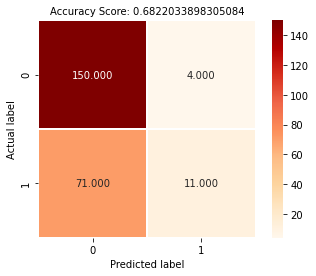

In [78]:
lr = LogisticRegression()
lr.fit(x_train, y_train)
pred ,acc = train_predict(lr,x_train, y_train,x_test, y_test)
plot_confusion( pred , y_test ,acc)

# Decision tree classifier

Training a DecisionTreeClassifier using a training set size of 941 
for training set
accuracy : 0.6695005313496281

for test set
accuracy : 0.652542372881356


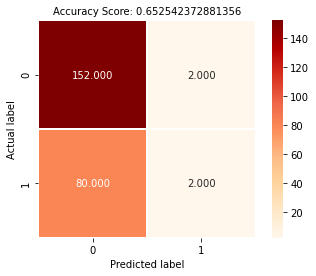

In [79]:
dtree_modelhome = DecisionTreeClassifier(max_depth = 2)
pred ,acc= train_predict(dtree_modelhome,x_train, y_train,x_test, y_test)
plot_confusion( pred , y_test, acc)

# k neighbor classification

Training a KNeighborsClassifier using a training set size of 941 
for training set
accuracy : 0.7151965993623804

for test set
accuracy : 0.6610169491525424


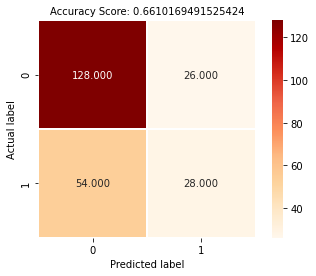

In [80]:
knn = KNeighborsClassifier(n_neighbors = 7)
pred ,acc= train_predict(knn,x_train, y_train,x_test, y_test)
plot_confusion( pred , y_test, acc)

# Fake video detection

In [81]:
def predict(video):
    a=count_blinks_ear(video)
    b=[0,0,0]
    b[0] = a[0]
    b[1] = a[1]
    b[2] = a[0]/a[2]
    c=[b]
    print(lr.predict(c))

In [82]:
pathReal = "./Predict/real/"
pathFake = "./Predict/fakes/"

## Prediction 1
* Here prediction is correct because fake video does not mimic eye blink properly 

In [83]:
video1 = pathReal +str('real0.mp4')
predict(video1)

8 blinks found
['Real']


In [84]:
video2 = pathFake +str('fake0.mp4')
predict(video2)

0 blinks found
['Fake']


## Prediction 2
* Here prediction is correct because fake video does not mimic eye blink properly

In [85]:
video1 = pathReal +str('real1.mp4')
predict(video1)

2 blinks found
['Real']


In [86]:
video2 = pathFake +str('fake1.mp4')
predict(video2)

0 blinks found
['Fake']


## Prediction 3
* Here prediction is correct because fake video does not mimic eye blink properly

In [87]:
video1 = pathReal +str('real2.mp4')
predict(video1)

1 blinks found
['Real']


In [88]:
video2 = pathFake +str('fake2.mp4')
predict(video2)

0 blinks found
['Fake']


## Prediction 4
* Here prediction is incorrect because fake video mimiced eye blink properly

In [89]:
video1 = pathReal +str('real3.mp4')
predict(video1)

4 blinks found
['Real']


In [90]:
video2 = pathFake +str('fake3.mp4')
predict(video2)

4 blinks found
['Real']
